## Week 3 Project 2:
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### 07/02/2018 (due date)
##### python version: 2.7
---

## Degree and Eigenvector centrality


Project 2

    1.Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
    
    2.Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
    
    3.What can you infer about each of the distinct groups?

## 1. Identify Data:

The group identified data at source: http://konect.uni-koblenz.de/networks/moreno_crime.

Original Source: http://moreno.ss.uci.edu/data.html#crime

**DESCRIPTION** One 870×557 two mode valued matrix of individuals by involvement in crime events. One 870×1 vector displaying the sex of each individual.

CRIME two mode, valued
SEX vector reporting sex of each individual.

**BACKGROUND** In the 1990s Rick Rosenfeld and Norm White used police records to collect data on crime in St. Louis. They began with five homicides and recorded the names of all the individuals who had been involved as victims, suspects or witnesses. They then explored the files and recorded all the other crimes in which those same individuals appeared. This snowball process was continued until they had data on 557 crime events. Those events involved 870 participants of which: 569 appeared as victims 682 appeared as suspects 195 appeared as witnesses, and 41 were dual (they were recorded both as victims and suspects in the same crime. Their data appear, then, as an 870 by 557, individual by crime event matrix. Victims are coded as 1, suspects as 2, witnesses as 3 and duals as 4.
In addition Rosenfeld and White recorded the sex of each individual.

## 2. Load & explore the data.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
%matplotlib inline

In [47]:
#Loading TSV file
crime_df = pd.read_csv("https://raw.githubusercontent.com/silverrainb/web-analytics/master/project2/Data/out.moreno_crime_crime", delim_whitespace=True, header=None, skiprows=[0,1], names=['PERSON', 'CRIME'])

#load role
crime_df['ROLE'] = pd.read_csv("https://raw.githubusercontent.com/silverrainb/web-analytics/master/project2/Data/rel.moreno_crime_crime.person.role", header=None)

#load person information
person_df = pd.read_csv("https://raw.githubusercontent.com/silverrainb/web-analytics/master/project2/Data/ent.moreno_crime_crime.person.name", header=None,names=['NAME'])

#sex of person
person_df['SEX'] = pd.read_csv("https://raw.githubusercontent.com/silverrainb/web-analytics/master/project2/Data/ent.moreno_crime_crime.person.sex", header=None)

#replace sex 1 and 0 with male or female
person_df =person_df.replace({'SEX': {1: 'M', 0: 'F'}})

#added index number that matches person crime number
person_df['PERSON'] = person_df.index.values+1

#merged data from crime data and person

all_data_df = pd.merge(crime_df,person_df, on=['PERSON'],how='outer')

#will go back and clean

In [54]:
all_data_df.head(10)
#all_data_df.to_csv("test.csv")

all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 0 to 1475
Data columns (total 5 columns):
PERSON    1476 non-null int64
CRIME     1476 non-null int64
ROLE      1476 non-null object
NAME      1476 non-null object
SEX       1476 non-null object
dtypes: int64(2), object(3)
memory usage: 69.2+ KB


In [55]:
all_data_df = pd.DataFrame(all_data_df)

In [56]:
all_data_df

,PERSON,CRIME,ROLE,NAME,SEX
0,1,1,Suspect,AbelDennis,M
1,1,2,Victim,AbelDennis,M
2,1,3,Victim,AbelDennis,M
3,1,4,Suspect,AbelDennis,M
4,2,5,Victim,AbramsChad,M
5,2,6,Suspect,AbramsChad,M
6,2,7,Victim,AbramsChad,M
7,2,8,Suspect,AbramsChad,M
8,2,9,Suspect,AbramsChad,M
9,2,10,Suspect,AbramsChad,M


In [58]:
G = nx.from_pandas_edgelist(all_data_df , 'PERSON','CRIME', edge_attr = ['ROLE','NAME','SEX'],create_using=nx.Graph())

In [59]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 829
Number of edges: 1475
Average degree:   3.5585


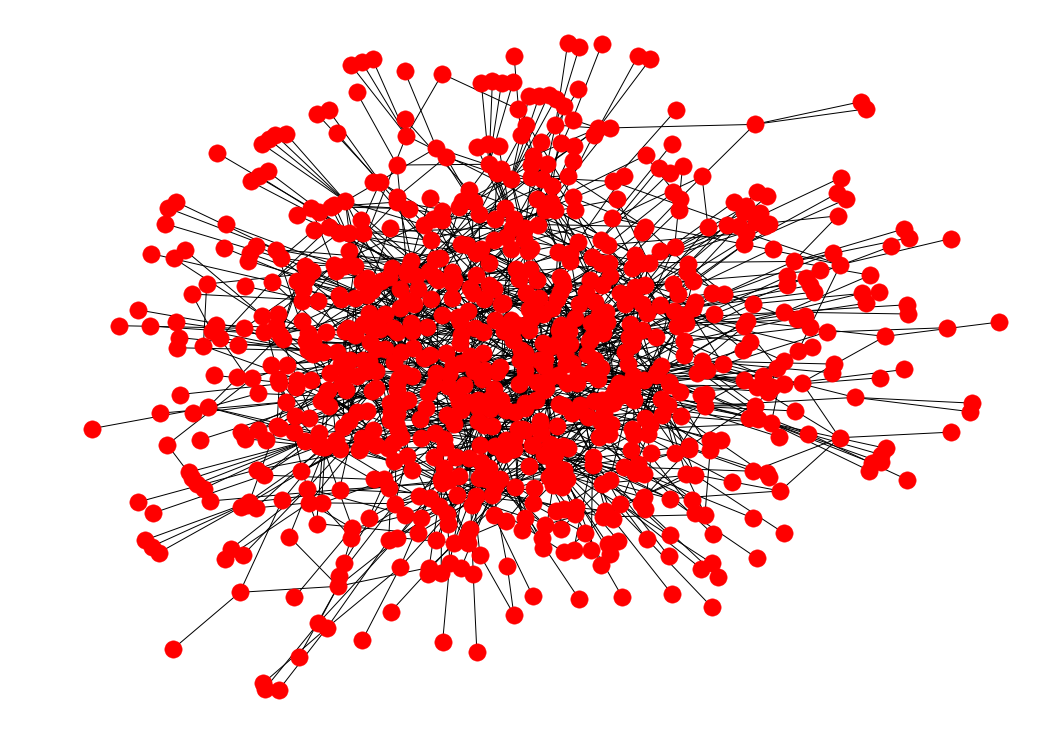

In [62]:
plt.figure(figsize=(14, 10))
nx.draw(G)
plt.show()

In [64]:
#G.edges(data=True)


False

## Sources

http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/